In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the CSV file
csv_data = pd.read_csv('0_seven_datasets.csv', skiprows=1)  # Skip the header row with X, Y labels

# Define the dataset columns based on observed structure
datasets = {
    "Dataset One": (0, 1),
    "Dataset Two": (3, 4),
    "Dataset Three": (6, 7),
    "Dataset Four": (9, 10),
    "Dataset Five": (12, 13),
    "Dataset Six": (15, 16),
    "Dataset Seven": (18, 19)
}

In [10]:
# Dictionary to store correlations
correlations = {}

# Compute correlations for each dataset
for name, (x_col, y_col) in datasets.items():
    # Extract dataset skipping NaN columns and ensure numeric conversion
    dataset = csv_data.iloc[:, [x_col, y_col]].dropna()
    dataset.columns = ['X', 'Y']  # Rename columns to X and Y
    dataset = dataset.astype(float)  # Convert data to float for correlation calculation

    # Calculate correlation and store it
    correlation = dataset['X'].corr(dataset['Y'])
    correlations[name] = correlation

# Display correlations in a table format
correlation_table = pd.DataFrame(list(correlations.items()), columns=['Dataset', 'Correlation'])
print(correlation_table)

         Dataset  Correlation
0    Dataset One    -0.032461
1    Dataset Two    -0.005160
2  Dataset Three    -0.027267
3   Dataset Four    -0.020998
4   Dataset Five    -0.017435
5    Dataset Six     0.075651
6  Dataset Seven    -0.029710


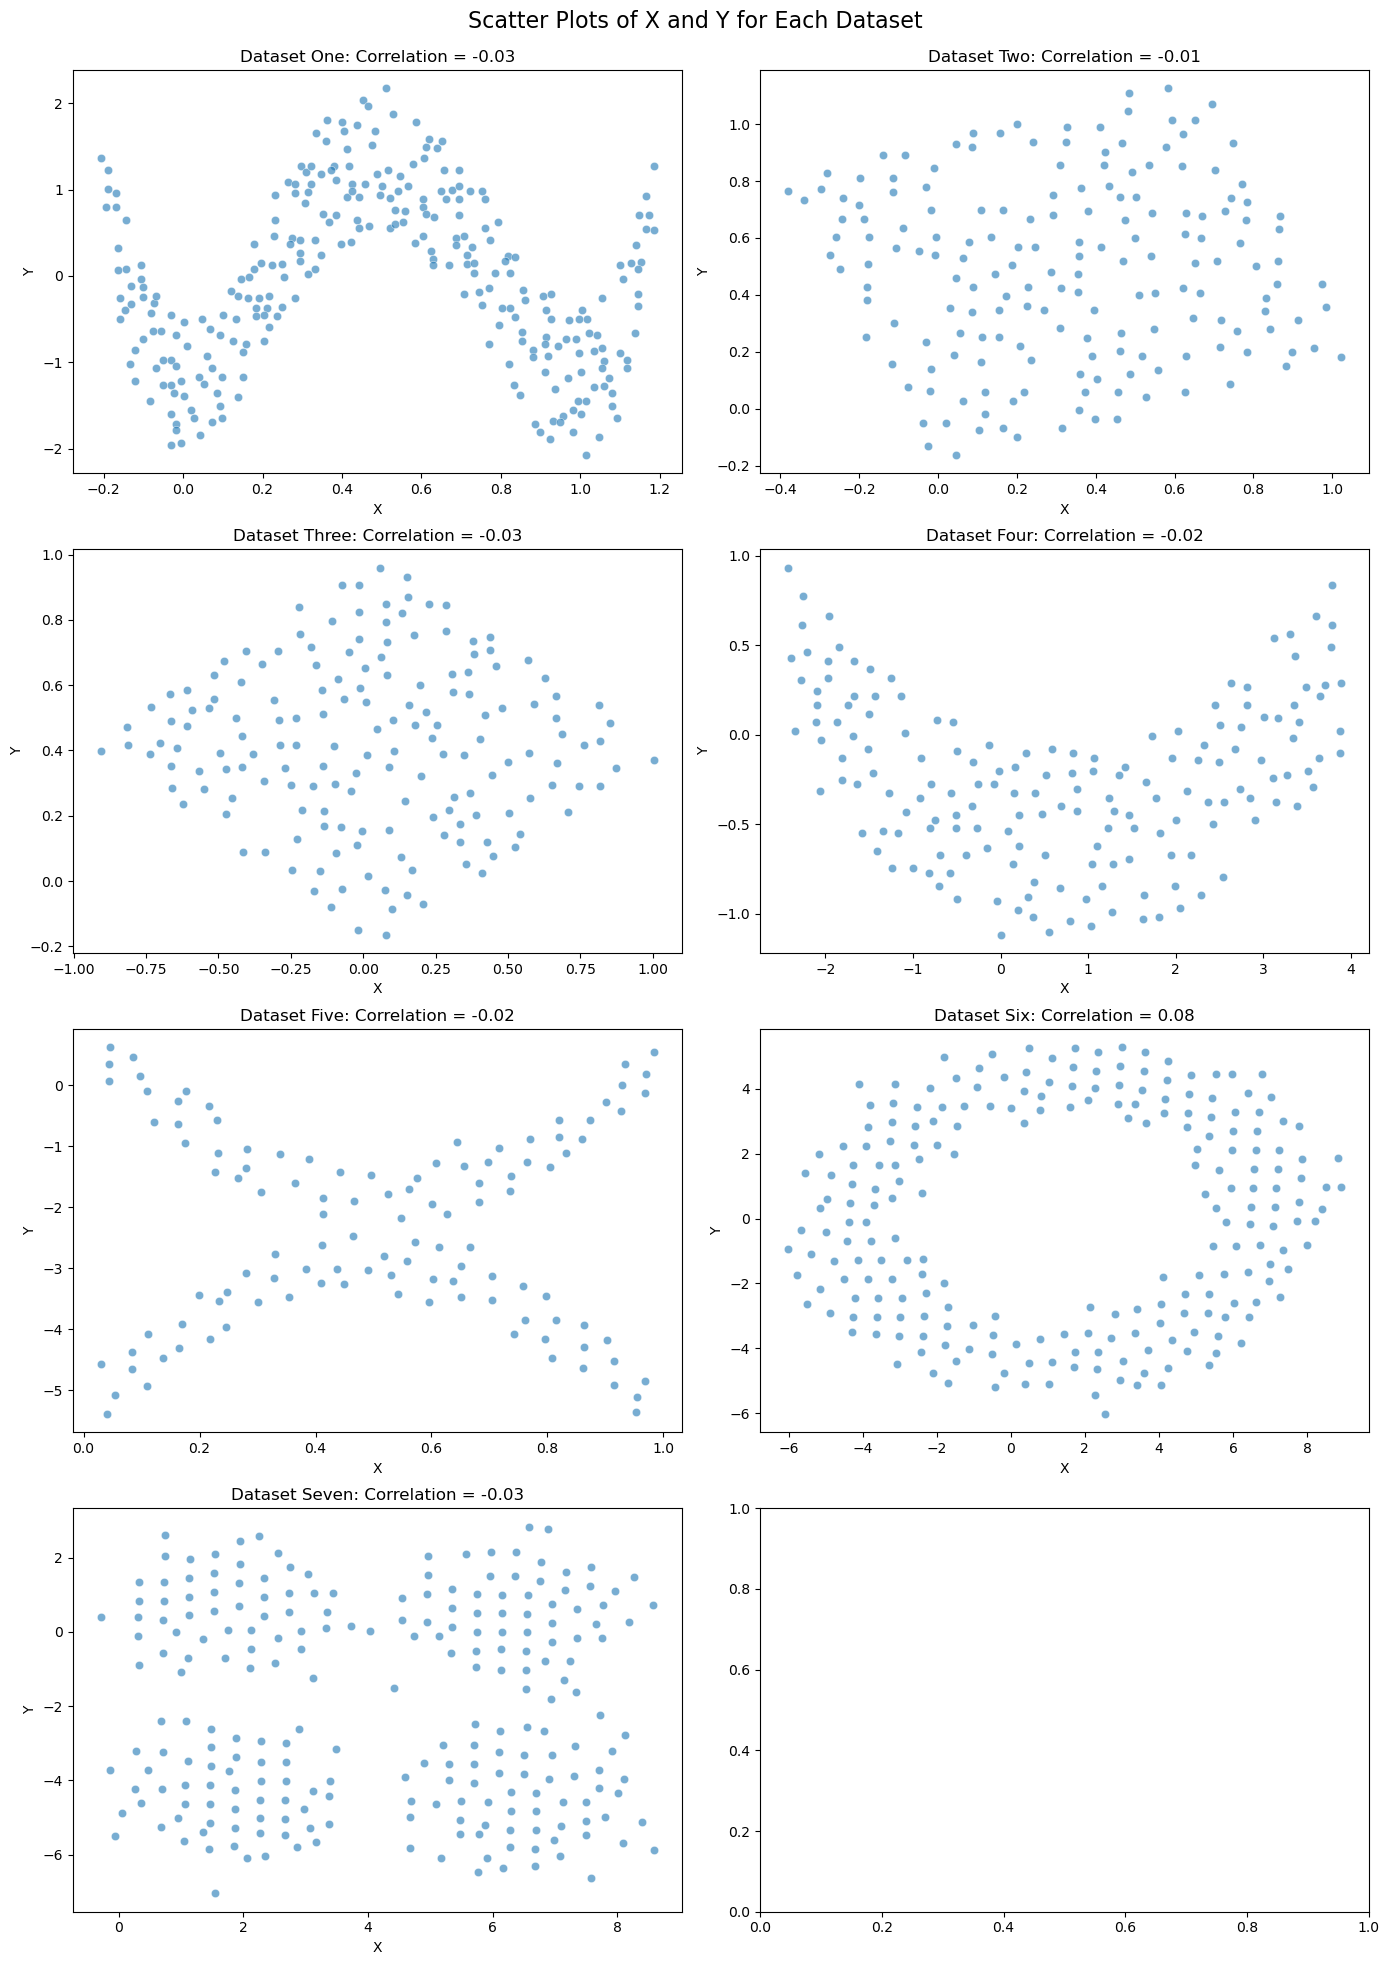

In [11]:
# Plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for idx, (name, (x_col, y_col)) in enumerate(datasets.items()):
    dataset = csv_data.iloc[:, [x_col, y_col]].dropna()
    dataset.columns = ['X', 'Y']
    dataset = dataset.astype(float)
    
    sns.scatterplot(x='X', y='Y', data=dataset, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'{name}: Correlation = {correlations[name]:.2f}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('Y')

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Scatter Plots of X and Y for Each Dataset", fontsize=16)
plt.show()